In [45]:
import zipfile
import os
import matplotlib.pyplot as plt

In [4]:
zip_file_path = 'Amazon_Books_Review_Dataset.zip'
destination_folder = 'dataset'

os.makedirs(destination_folder, exist_ok = True)

In [ ]:
with zipfile.ZipFile(zip_file_path, 'r') as file:
    file.extractall(destination_folder)
    
extracted_files = os.listdir(destination_folder)
for f in extracted_files:
    print(f)

In [46]:
import pandas as pd

## Loading the dataset

In [47]:
books_data = pd.read_csv('dataset/books_data.csv')
books_rating = pd.read_csv('dataset/Books_rating.csv')

In [48]:
books_data.head()

,Title,description,authors,image,previewLink,publisher,publishedDate,infoLink,categories,ratingsCount
0,Its Only Art If Its Well Hung!,NaN,['Julie Strain'],http://books.google.com/books/content?id=DykPA...,http://books.google.nl/books?id=DykPAAAACAAJ&d...,NaN,1996,http://books.google.nl/books?id=DykPAAAACAAJ&d...,['Comics & Graphic Novels'],NaN
1,Dr. Seuss: American Icon,Philip Nel takes a fascinating look into the k...,['Philip Nel'],http://books.google.com/books/content?id=IjvHQ...,http://books.google.nl/books?id=IjvHQsCn_pgC&p...,A&C Black,2005-01-01,http://books.google.nl/books?id=IjvHQsCn_pgC&d...,['Biography & Autobiography'],NaN
2,Wonderful Worship in Smaller Churches,This resource includes twelve principles in un...,['David R. Ray'],http://books.google.com/books/content?id=2tsDA...,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,NaN,2000,http://books.google.nl/books?id=2tsDAAAACAAJ&d...,['Religion'],NaN
3,Whispers of the Wicked Saints,Julia Thomas finds her life spinning out of co...,['Veronica Haddon'],http://books.google.com/books/content?id=aRSIg...,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,iUniverse,2005-02,http://books.google.nl/books?id=aRSIgJlq6JwC&d...,['Fiction'],NaN
4,"Nation Dance: Religion, Identity and Cultural ...",NaN,['Edward Long'],NaN,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,2003-03-01,http://books.google.nl/books?id=399SPgAACAAJ&d...,NaN,NaN


In [49]:
books_rating.head()

,Id,Title,Price,User_id,profileName,review/helpfulness,review/score,review/time,review/summary,review/text
0,1882931173,Its Only Art If Its Well Hung!,NaN,AVCGYZL8FQQTD,"Jim of Oz ""jim-of-oz""",7/7,4.0,940636800,Nice collection of Julie Strain images,This is only for Julie Strain fans. It's a col...
1,0826414346,Dr. Seuss: American Icon,NaN,A30TK6U7DNS82R,Kevin Killian,10/10,5.0,1095724800,Really Enjoyed It,I don't care much for Dr. Seuss but after read...
2,0826414346,Dr. Seuss: American Icon,NaN,A3UH4UZ4RSVO82,John Granger,10/11,5.0,1078790400,Essential for every personal and Public Library,"If people become the books they read and if ""t..."
3,0826414346,Dr. Seuss: American Icon,NaN,A2MVUWT453QH61,"Roy E. Perry ""amateur philosopher""",7/7,4.0,1090713600,Phlip Nel gives silly Seuss a serious treatment,"Theodore Seuss Geisel (1904-1991), aka &quot;D..."
4,0826414346,Dr. Seuss: American Icon,NaN,A22X4XUPKF66MR,"D. H. Richards ""ninthwavestore""",3/3,4.0,1107993600,Good academic overview,Philip Nel - Dr. Seuss: American IconThis is b...


## Data Cleaning 

In [50]:
total_entries = len(books_data['ratingsCount'])
null_entries = books_data['ratingsCount'].isna().sum()

print('Total number of entries in column "ratingsCount":', total_entries)
print('Number of null entries in column "ratingsCount":', null_entries)

Total number of entries in column "ratingsCount": 212404
Number of null entries in column "ratingsCount": 162652


Therefore, we see that a huge number of the total entries (over 75%) of the entries are null values. Thus, instead of using imputation, we are simply disregarding the null entries for a more accurate analysis of the distribution of ratings.

In [51]:
non_null_ratings = books_data['ratingsCount'].dropna()
ratings_dist = non_null_ratings.value_counts()
print('Number of non-null entries: ', len(non_null_ratings))
print('Distribution of the count of ratings: ') 
print(ratings_dist)

Number of non-null entries:  49752
Distribution of the count of ratings: 
1.0       20919
2.0        8249
3.0        4393
4.0        2798
5.0        1995
          ...  
175.0         1
2497.0        1
2632.0        1
3372.0        1
321.0         1
Name: ratingsCount, Length: 478, dtype: int64


In [52]:
# Now, I will remove the outliers present in the data for a better visualisation on the pie chart

Q1 = non_null_ratings.quantile(0.25)
Q3 = non_null_ratings.quantile(0.75)

IQR = Q3 - Q1

lower = Q1 - IQR*1.5
upper = Q3 + IQR*1.5

print('lower bound for entries: ', lower)
print('upper bound for entries: ', upper)

# making use of these bounds, to remove outliers

non_null_ratings = non_null_ratings.apply(lambda rating: upper if rating > upper else (lower if rating < lower else rating))

lower bound for entries:  -5.0
upper bound for entries:  11.0


In [53]:
ratings_distribution = non_null_ratings.value_counts()
print(ratings_distribution)

1.0     20919
2.0      8249
11.0     6655
3.0      4393
4.0      2798
5.0      1995
6.0      1407
7.0      1098
8.0       893
9.0       740
10.0      605
Name: ratingsCount, dtype: int64


## Pie Chart Visualisation

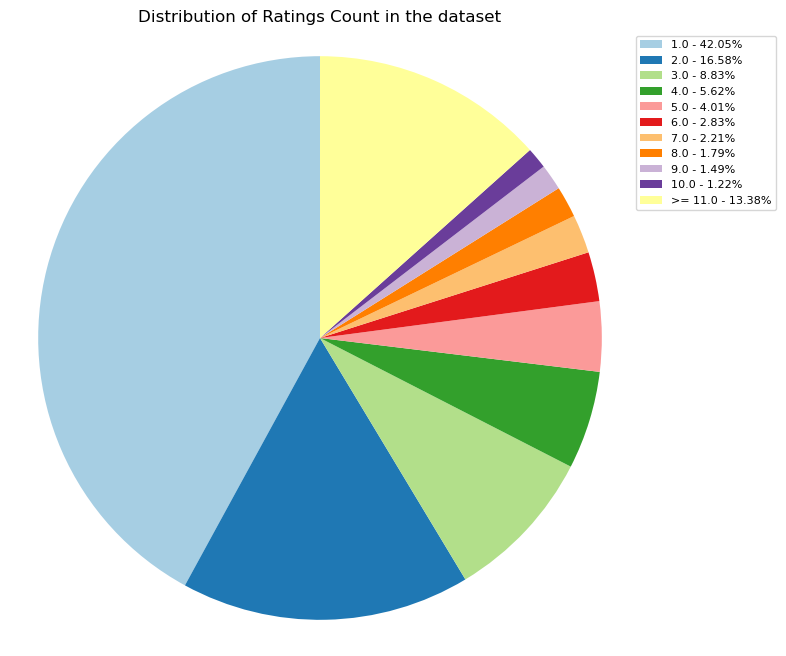

In [54]:
# finally, plotting the pie chart for a visualisation

ratings_distribution = ratings_distribution.sort_index()
labels = [f'>= {i} - {p:.2f}%' if i == 11.0 else f'{i} - {p:.2f}%' for i, p in zip(ratings_distribution.index, ratings_distribution.values / ratings_distribution.sum() * 100)]

plt.figure(figsize=(8, 8))
patches, text = plt.pie(ratings_distribution, startangle=90, colors=plt.cm.Paired.colors)
plt.title('Distribution of Ratings Count in the dataset')
plt.axis('equal')

# the legend basically provides the percentage of entries with that particular rating (this is after
# removal of the outliers)

plt.legend(patches, labels, loc='best', bbox_to_anchor=(1.0, 1.0),
           fontsize=8)

plt.show()

## Analysis: 

The pie chart suggests that for a huge number of books (more than 75% of the books reviewed), the Ratings Count is less than or equal to 5.0. This means that more than 75% of the books that have been reviewed, have only been reviewed by less than or equal 5 critiques. This potentially indicates that a majority of the books that have been reviewed are less popular books or belong to niche categories, suggesting that they might be books that are relatively new to the market or have a limited audience in general (which basically explains why they have been reviewed by such few critiques). 